In [2]:
# Import Dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

# Imports the method used for connecting to DBs
from sqlalchemy import create_engine, func, inspect

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 

In [5]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base.metadata.create_all(engine)

NameError: name 'Base' is not defined

In [10]:
from sqlalchemy.orm import Session
session= Session(bind=engine)

In [11]:
# Reflect an existing database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# Reflect the tables


['measurement', 'station']

In [12]:
# Save references to each table- Assigning the class to a variable Station and Measurement
Station= Base.classes.station
Measurement= Base.classes.measurement

In [13]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff5aaba1fa0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [14]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff5aab6fe50>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

In [15]:
# Use the session to query Measurement table and display the first 15 trade volumes
for row in session.query(Measurement.date, Measurement.tobs).limit(15).all():
    print(row)

('2010-01-01', 65.0)
('2010-01-02', 63.0)
('2010-01-03', 74.0)
('2010-01-04', 76.0)
('2010-01-06', 73.0)
('2010-01-07', 70.0)
('2010-01-08', 64.0)
('2010-01-09', 68.0)
('2010-01-10', 73.0)
('2010-01-11', 64.0)
('2010-01-12', 61.0)
('2010-01-14', 66.0)
('2010-01-15', 65.0)
('2010-01-16', 68.0)
('2010-01-17', 64.0)


In [16]:
engine.execute("SELECT * FROM Station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [17]:
engine.execute("SELECT * FROM Measurement").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

# Exploratory Precipitation Analysis

In [18]:
# Connect to the engine
conn=engine.connect()

# Query all records in the Database- Measurement
df_measures=pd.read_sql("SELECT * FROM Measurement", conn)

# Query all records in the Database- Measurement
df_station=pd.read_sql("SELECT * FROM Station", conn)


In [19]:
# Create the inspector and connect it to the engine
inspector= inspect(engine)

In [20]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [21]:
# Using inspector to inspect the names and columns data types of measurement

columns= inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [22]:
# Using inspector to inspect the names and columns data types ofstation


columns= inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
max_date=session.query(func.max(Measurement.date)).all()

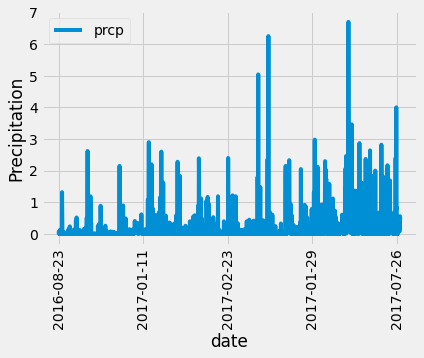

In [32]:
# Design a query to retrieve the last 12 months of precipitation data 
#and plot the results. 
# Starting from the most recent data point in the database. 
twelve_months_precipt=session.query(Measurement.date, Measurement.prcp).\
                      filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()

# Save the query´s results as a Pandas DataFrame and set the index to the date column
df_prcp_months = pd.DataFrame(twelve_months_precipt[:], columns=['date', 'prcp'])

# Erase NA values
df_prcp_months = df_prcp_months.dropna()
df_prcp_months.head(10)


# Plot the df using Pandas in a bar chart 
df_prcp_months.plot(x= 'date', y='prcp', rot=90)
plt.ylabel("Precipitation")
plt.show()

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats = df_prcp_months.describe()
print(stats)

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number stations in the dataset
total_station= session.query(Station.station).count()
total_station

9

In [41]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_rows_station= session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_rows_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [1]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
diff_temp= session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station=='USC00519281').all()
diff_temp                                                                                              

NameError: name 'session' is not defined

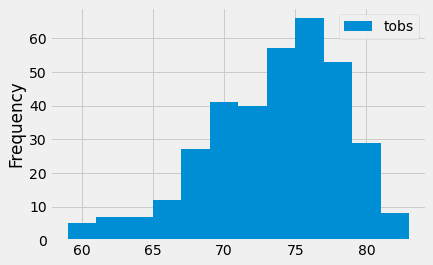

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
avtive_month= session.query(Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()


df_avtive_month= pd.DataFrame(avtive_month)

df_avtive_month.plot.hist(bins= 12)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()